# Immigration towards the United Kingdom and it's correlation with Employment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Total Employment in STEM, in thousands 
df=pd.read_excel("C:\\Users\\ibsi\\Desktop\\STEM-HTEC-Emplyoment-in-the-EU\\Datasets\\Immigration.xls", sheet_name="Total")
df.head(5)

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Belgium,:,135281,147377,129477,120078,123158,146626,123702,126703,137860
1,Bulgaria,:,:,:,14103,18570,26615,25223,21241,25597,29559
2,Czechia,75620,48317,27114,34337,30124,29897,29602,64083,51847,65910
3,Denmark,51800,52236,52833,54409,60312,68388,78492,74383,68579,64669
4,Germany,346216,404055,489422,592175,692713,884893,1571047,1029852,917109,893886


In [3]:
df1=pd.read_excel("C:\\Users\\ibsi\\Desktop\\STEM-HTEC-Emplyoment-in-the-EU\\Datasets\\Employment in HTEC.xlsx", sheet_name="HTEC(thousands)")
df1=df1.drop(df1.index[0:4]).reset_index(drop = True)
df1.head(5)

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,211.2,207.8,213.3,198.4,198.6,198.6,196.7,211.3,230.5,245.1
1,Bulgaria,93.3,90.9,93.8,98.8,97.0,112.8,116.1,114.8,122.6,127.7
2,Czechia,209.4,221.2,215.0,226.9,238.2,229.2,242.0,243.6,261.9,257.7
3,Denmark,144.6,145.6,144.8,145.6,149.5,154.5,154.0,143.5,146.8,157.3
4,Germany,1627.8,1662.2,1687.8,1633.7,1648.4,1627.7,1670.4,1703.7,1738.2,1759.0


In [4]:
#Is there a relationship between the Immigration and the availability of jobs in the STEM(HTEC) sector

df=df.loc[df["Country"] == "United Kingdom"]
df1=df1.loc[df1["Country"] == "United Kingdom"]
frames = [df, df1]
result = pd.concat(frames)
del result["Country"]
df = pd.DataFrame(data=result)
df=df.reset_index(drop=True)
df_transposed = df.T
df_transposed
test=df_transposed.apply(pd.to_numeric)
test2 = test.rename(columns={0: "Immigrants", 1: "Employment"})
test2=test2.dropna()
test2.dtypes

Immigrants    float64
Employment    float64
dtype: object

In [5]:
#model = sm.OLS(test2["Immigrants"].astype(float),test["Employment"].astype(float))
model = sm.OLS(test2["Immigrants"],test2["Employment"])
results = model.fit()
results.summary()

C:\Users\ibsi\miniconda3\envs\Ironhack_bootcamp\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Immigrants   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1408.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    2.79e-10
Time:                        13:57:54   Log-Likelihood:                         -109.05
No. Observations:                   9   AIC:                                      220.1
Df Residuals:                       8   BIC:                                      220.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Employment   413.8595     11.029     37.524      0.000     388.426     439.293
==============================================================================
Omnibus:                        0.824   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.675
Skew:                           0.506   Prob(JB):                        0.714
Kurtosis:                       2.120   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

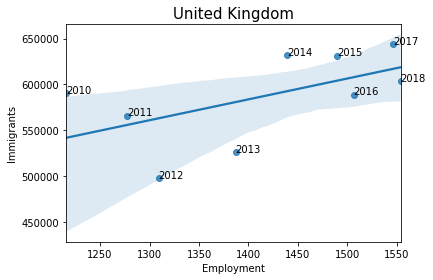

In [6]:
test3 = test2.assign(Year = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"])
ax = sns.regplot(x="Employment", y="Immigrants", data=test3)
plt.title("United Kingdom", c='Black', fontsize=15)
i = 0
for xy in zip(test3["Employment"], test3["Immigrants"]):
    year = test3.index[i]
    ax.annotate(year, xy=xy, textcoords='data')
    i+=1
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_16", transparent=True, bbox_inches="tight")